Load necessary packages

In [1]:
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
%matplotlib inline
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cmocean

plt.style.use("thesis")

Read in mixing and diffusivity time series

In [2]:
with h5py.File("gkb_stats/U1/APE.h5","r") as f:
    tiiU1 = f["tii"][()]
    MU1 = f["M"][()]
    DU1 = f["Dp"][()]
    KU1 = f["Kd"][()]
    
with h5py.File("gkb_stats/U2/APE.h5","r") as f:
    tiiU2 = f["tii"][()]
    MU2 = f["M"][()]
    DU2 = f["Dp"][()]
    KU2 = f["Kd"][()]

with h5py.File("gkb_stats/U3/APE.h5","r") as f:
    tiiU3 = f["tii"][()]
    MU3 = f["M"][()]
    DU3 = f["Dp"][()]
    KU3 = f["Kd"][()]
    
with h5py.File("gkb_stats/U4/APE.h5","r") as f:
    tiiU4 = f["tii"][()]
    MU4 = f["M"][()]
    DU4 = f["Dp"][()]
    KU4 = f["Kd"][()]
    
with h5py.File("gkb_stats/F1/APE.h5","r") as f:
    tiiF1 = f["tii"][()]
    MF1 = f["M"][()]
    DF1 = f["Dp"][()]
    KF1 = f["Kd"][()]
    
with h5py.File("gkb_stats/F2/APE.h5","r") as f:
    tiiF2 = f["tii"][()]
    MF2 = f["M"][()]
    DF2 = f["Dp"][()]
    KF2 = f["Kd"][()]

with h5py.File("gkb_stats/F3/APE.h5","r") as f:
    tiiF3 = f["tii"][()]
    MF3 = f["M"][()]
    DF3 = f["Dp"][()]
    KF3 = f["Kd"][()]

Read in $\chi$ time series

In [3]:
with h5py.File("gkb_stats/U1/budgets.h5","r") as f:
    tU1 = f["t"][()]
    cU1 = f["chiM"][()] + f["chiP"][()]
    
with h5py.File("gkb_stats/U2/budgets.h5","r") as f:
    tU2 = f["t"][()]
    cU2 = f["chiM"][()] + f["chiP"][()]
    
with h5py.File("gkb_stats/U3/budgets.h5","r") as f:
    tU3 = f["t"][()]
    cU3 = f["chiM"][()] + f["chiP"][()]
    
with h5py.File("gkb_stats/U4/budgets.h5","r") as f:
    tU4 = f["t"][()]
    cU4 = f["chiM"][()] + f["chiP"][()]
    
with h5py.File("gkb_stats/F1/budgets.h5","r") as f:
    tF1 = f["t"][()]
    cF1 = f["chiM"][()] + f["chiP"][()]
    
with h5py.File("gkb_stats/F2/budgets.h5","r") as f:
    tF2 = f["t"][()]
    cF2 = f["chiM"][()] + f["chiP"][()]
    
with h5py.File("gkb_stats/F3/budgets.h5","r") as f:
    tF3 = f["t"][()]
    cF3 = f["chiM"][()] + f["chiP"][()]

Define annotation function

In [4]:
def anno_bl(ax, str):
    l, r = ax.get_xlim()
    b, t = ax.get_ylim()
    ax.annotate(str, (l, b), xytext=(3, 3), textcoords="offset points", ha='left', va='bottom')
    return

## Plot figure 10

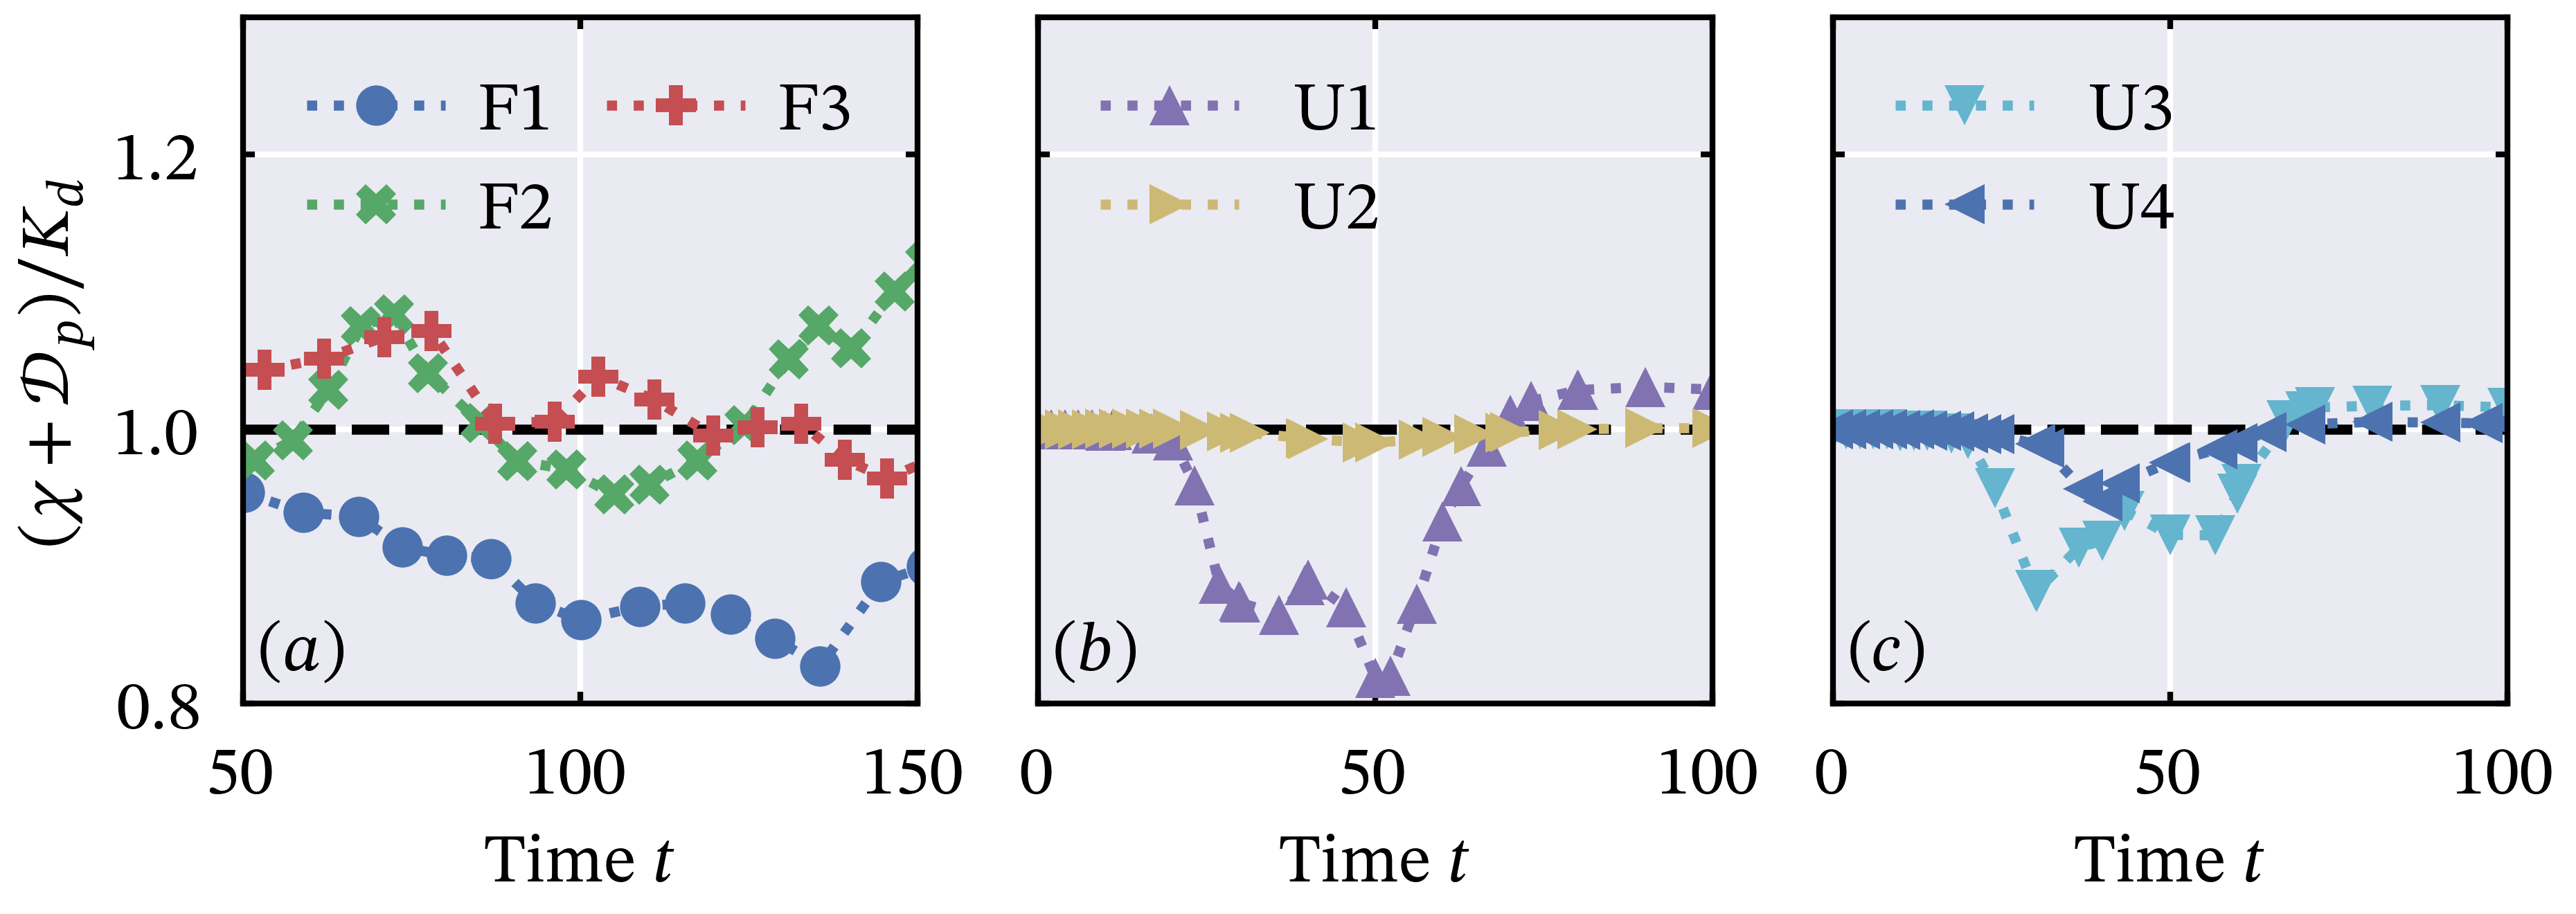

In [5]:
ciF1, ciF2 = np.interp(tiiF1, tF1, cF1), np.interp(tiiF2, tF2, cF2)
ciF3 = np.interp(tiiF3, tF3, cF3)
ciU1, ciU2 = np.interp(tiiU1, tU1, cU1), np.interp(tiiU2, tU2, cU2)
ciU3, ciU4 = np.interp(tiiU3, tU3, cU3), np.interp(tiiU4, tU4, cU4)

fig, axs = plt.subplots(1,3,figsize=(6.2,2.2), sharey=True)

ax=axs[0]
ax.plot(tiiF1, np.ones(tiiF1.size), 'k--')
ax.plot(tiiF1, (ciF1+DF1)/KF1,':o', label = "F1", color="C0")
ax.plot(tiiF2, (ciF2+DF2)/KF2,':X', label = "F2", color="C1")
ax.plot(tiiF3, (ciF3+DF3)/KF3,':P', label = "F3", color="C2")
ax.set(
    ylim=[0.8,1.3],
    xlim=[50,150],
    xlabel="Time $t$",
    ylabel=r"$(\chi + \mathcal{D}_p) / K_d$"
)
ax.legend(ncol=2, loc='upper center', handletextpad=0.5, columnspacing=0.75)

ax = axs[1]
ax.plot(tiiU1, np.ones(tiiU1.size), 'k--')
ax.plot(tiiU1, (ciU1+DU1)/KU1,':^', label = "U1", color="C3")
ax.plot(tiiU2, (ciU2+DU2)/KU2,':>', label = "U2", color="C4")
ax.set(
    xlim=[0,100],
    xlabel="Time $t$"
)
ax.legend(loc='upper left')

ax = axs[2]
ax.plot(tiiU3, np.ones(tiiU3.size), 'k--')
ax.plot(tiiU3, (ciU3+DU3)/KU3,':v', color="C5", label="U3")
ax.plot(tiiU4, (ciU4+DU4)/KU4,':<', color="C6", label="U4")
ax.set(
    xlim=[0,100],
    xlabel="Time $t$"
)
ax.legend(loc='upper left')

anno_bl(axs[0], "$(a)$")
anno_bl(axs[1], "$(b)$")
anno_bl(axs[2], "$(c)$")

# fig.savefig("diffusivity.pdf")
# fig.savefig("EPS/diffusivity.eps")
plt.show()